## Libraries for TSA using FB-Prophet

In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

## Passengers data for TSA

In [2]:
df = pd.read_csv('airline_passengers.csv')
df

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,NaN,NaN


## Trend check of the data

<AxesSubplot:>

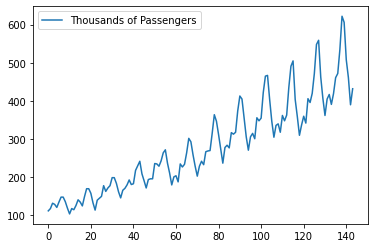

In [3]:
df.plot()

## Column names substitution for data reading by `fb-prophet`

In [4]:
df.columns = ['ds', 'y']
df.head()

,ds,y
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


### Dropping NA values

In [5]:
df.dropna(axis=0, inplace=True)
df.tail()

,ds,y
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


### Changing date column dtype: `object` to `datetime`

In [6]:
df['ds'] = pd.to_datetime(df['ds'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      144 non-null    datetime64[ns]
 1   y       144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


## FB-Prophet Model initiation

In [7]:
model = Prophet()

### Model Fitting

In [8]:
model.fit(df)

22:42:33 - cmdstanpy - INFO - Chain [1] start processing
22:42:33 - cmdstanpy - INFO - Chain [1] done processing


### Model components checking

In [9]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

## Creating future dates for prediction

In [10]:
future_dates = model.make_future_dataframe(periods=365)
future_dates

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
...,...
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30


## Prediction for Future dates

In [11]:
prediction = model.predict(future_dates)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.649986,56.484773,114.332343,106.649986,106.649986,-21.919811,-21.919811,-21.919811,-21.919811,-21.919811,-21.919811,0.0,0.0,0.0,84.730175
1,1949-02-01,108.824900,48.707576,104.862559,108.824900,108.824900,-30.691427,-30.691427,-30.691427,-30.691427,-30.691427,-30.691427,0.0,0.0,0.0,78.133473
2,1949-03-01,110.789338,81.406011,137.768466,110.789338,110.789338,-0.511120,-0.511120,-0.511120,-0.511120,-0.511120,-0.511120,0.0,0.0,0.0,110.278218
3,1949-04-01,112.964252,79.377326,136.190758,112.964252,112.964252,-5.172677,-5.172677,-5.172677,-5.172677,-5.172677,-5.172677,0.0,0.0,0.0,107.791575
4,1949-05-01,115.069008,82.331863,142.177878,115.069008,115.069008,-3.766717,-3.766717,-3.766717,-3.766717,-3.766717,-3.766717,0.0,0.0,0.0,111.302290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,1961-11-27,520.573111,467.798350,526.778893,520.003508,521.182353,-22.382101,-22.382101,-22.382101,-22.382101,-22.382101,-22.382101,0.0,0.0,0.0,498.191010
505,1961-11-28,520.673525,468.787712,527.702674,520.100280,521.283311,-24.010977,-24.010977,-24.010977,-24.010977,-24.010977,-24.010977,0.0,0.0,0.0,496.662548
506,1961-11-29,520.773938,468.193224,522.566621,520.197052,521.385505,-26.276704,-26.276704,-26.276704,-26.276704,-26.276704,-26.276704,0.0,0.0,0.0,494.497234
507,1961-11-30,520.874352,461.630718,518.640646,520.293824,521.489931,-29.135087,-29.135087,-29.135087,-29.135087,-29.135087,-29.135087,0.0,0.0,0.0,491.739265


### Prediction Plot

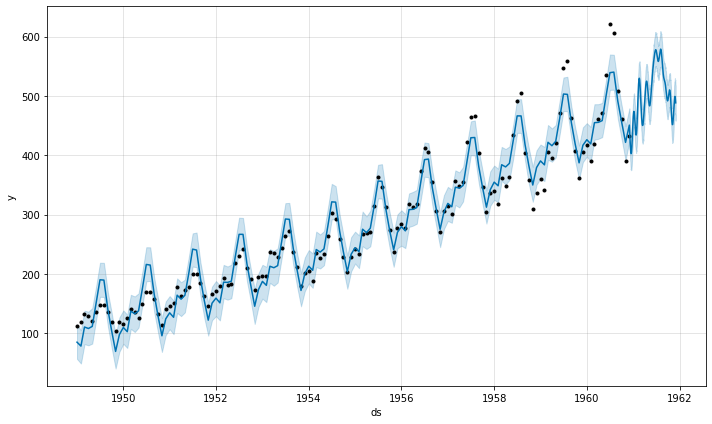

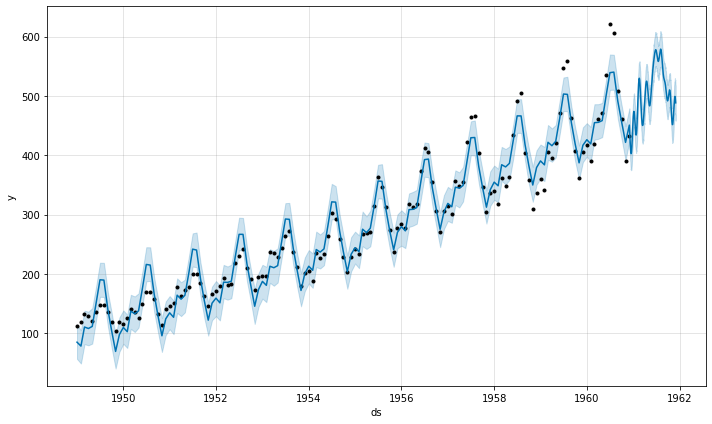

In [12]:
model.plot(prediction)

### Components of Prediction Plot

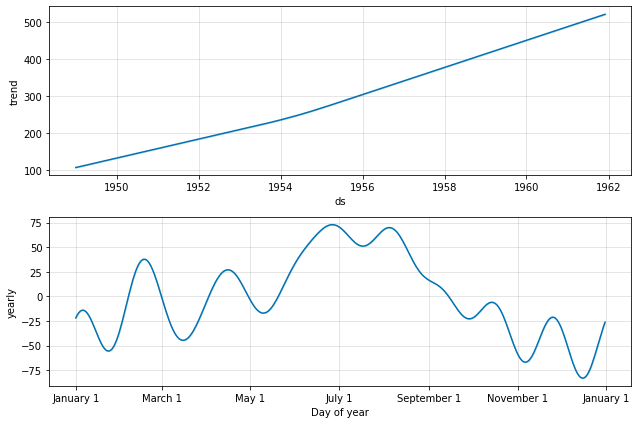

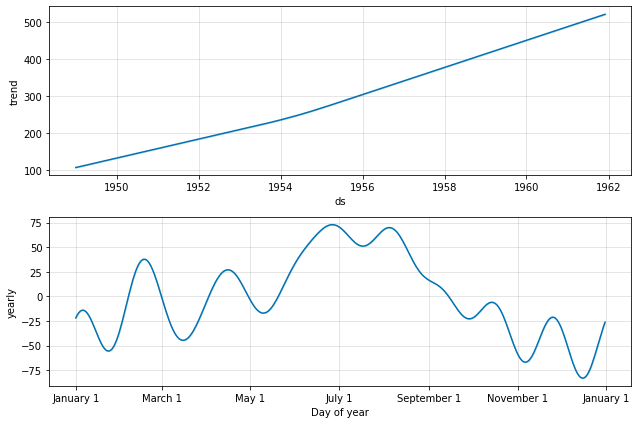

In [13]:
model.plot_components(prediction)

## Utilizing Cross-validation

In [14]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')
df_cv.head()

  0%|          | 0/19 [00:00<?, ?it/s]22:42:36 - cmdstanpy - INFO - Chain [1] start processing
22:43:11 - cmdstanpy - INFO - Chain [1] done processing
  5%|▌         | 1/19 [00:35<10:44, 35.80s/it]22:43:12 - cmdstanpy - INFO - Chain [1] start processing
22:43:13 - cmdstanpy - INFO - Chain [1] done processing
 11%|█         | 2/19 [00:37<04:30, 15.93s/it]22:43:14 - cmdstanpy - INFO - Chain [1] start processing
22:43:15 - cmdstanpy - INFO - Chain [1] done processing
 16%|█▌        | 3/19 [00:39<02:31,  9.46s/it]22:43:16 - cmdstanpy - INFO - Chain [1] start processing
22:43:17 - cmdstanpy - INFO - Chain [1] done processing
 21%|██        | 4/19 [00:41<01:37,  6.49s/it]22:43:18 - cmdstanpy - INFO - Chain [1] start processing
22:43:18 - cmdstanpy - INFO - Chain [1] done processing
 26%|██▋       | 5/19 [00:43<01:06,  4.73s/it]22:43:19 - cmdstanpy - INFO - Chain [1] start processing
22:43:20 - cmdstanpy - INFO - Chain [1] done processing
 32%|███▏      | 6/19 [00:45<00:49,  3.78s/it]22:43:21

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1951-02-01,156.860298,156.607665,157.164735,150.0,1951-01-18
1,1951-03-01,167.860783,166.996226,168.800308,178.0,1951-01-18
2,1951-04-01,154.548772,152.851016,156.384526,163.0,1951-01-18
3,1951-05-01,140.452709,137.592103,143.316430,172.0,1951-01-18
4,1951-06-01,173.971555,169.880585,178.026457,178.0,1951-01-18


### Performance metrics of Cross-validation

In [15]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,40 days,1084.414469,32.930449,25.852182,0.078430,0.073825,0.079470,0.227273
1,42 days,1012.726995,31.823372,25.356149,0.077611,0.073825,0.078343,0.181818
2,46 days,910.075032,30.167450,24.860582,0.079951,0.084235,0.079703,0.136364
3,47 days,1045.958737,32.341285,27.053500,0.083236,0.085745,0.083371,0.136364
4,48 days,1034.718606,32.167042,26.463562,0.081129,0.085745,0.081340,0.181818


### Cross-validation metrics Plot

c:\Python310\lib\site-packages\prophet\plot.py:544: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
c:\Python310\lib\site-packages\prophet\plot.py:545: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


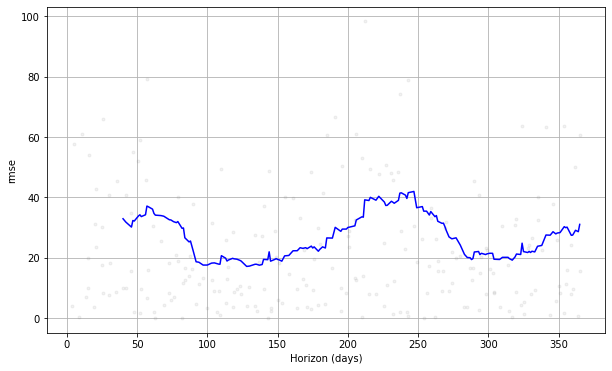

In [16]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')